<a href="https://colab.research.google.com/github/Park-da-in/ComputerVision_Seminar/blob/main/week4_%EA%B3%BC%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CV_seminar_project

/content/drive/MyDrive/CV_seminar_project


In [ ]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더
import os
import glob

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)

In [ ]:
device

'cuda'

In [ ]:
root_path = '/content/drive/MyDrive/CV_seminar_project'
train_path = '/content/drive/MyDrive/CV_seminar_project/train'
test_path = '/content/drive/MyDrive/CV_seminar_project/test'

dolphin_dir = '/dolphin/'
shark_dir = '/shark/'
whale_dir = '/whale/'

In [ ]:
resize_trans = transforms.Compose([
                                   transforms.Resize((128,128)),
                                   transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

In [ ]:
resize_train[0][0].shape

torch.Size([3, 128, 128])

In [ ]:
resize_train[0][0]

tensor([[[0.1804, 0.1882, 0.1882,  ..., 0.3020, 0.3020, 0.3059],
         [0.1647, 0.1843, 0.1922,  ..., 0.2980, 0.2980, 0.3020],
         [0.1294, 0.1412, 0.1804,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.1059, 0.0980, 0.0941,  ..., 0.0941, 0.0902, 0.0706],
         [0.0824, 0.0863, 0.0941,  ..., 0.0863, 0.0667, 0.0863],
         [0.0863, 0.0863, 0.0863,  ..., 0.0745, 0.0706, 0.0980]],

        [[0.3647, 0.3725, 0.3725,  ..., 0.5294, 0.5255, 0.5216],
         [0.3490, 0.3686, 0.3765,  ..., 0.5255, 0.5216, 0.5176],
         [0.3137, 0.3255, 0.3647,  ..., 0.5216, 0.5176, 0.5137],
         ...,
         [0.1922, 0.1882, 0.1843,  ..., 0.1294, 0.1373, 0.1294],
         [0.1647, 0.1686, 0.1804,  ..., 0.1255, 0.1137, 0.1529],
         [0.1529, 0.1529, 0.1647,  ..., 0.1216, 0.1333, 0.1843]],

        [[0.8196, 0.8275, 0.8275,  ..., 0.9137, 0.9137, 0.9176],
         [0.8039, 0.8235, 0.8314,  ..., 0.9137, 0.9098, 0.9137],
         [0.7686, 0.7804, 0.8196,  ..., 0.9098, 0.9059, 0.

In [ ]:
import numpy as np
np.mean(resize_train[0][0].numpy(),axis=(1,2))

array([0.16920143, 0.31231284, 0.6763141 ], dtype=float32)

In [ ]:
def get_mean_std(dataset):
  meanRGB = [np.mean( image.numpy(), axis=(1,2)) for image, _ in dataset]
  stdRGB = [np.std( image.numpy(), axis=(1,2)) for image, _ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.std([s[0] for s in stdRGB])
  stdG = np.std([s[1] for s in stdRGB])
  stdB = np.std([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

In [ ]:
resize_train_mean=[0.17191947, 0.41128376, 0.56153077]
resize_train_std=[0.16150557, 0.16577946, 0.16063999]

resize_test_mean=[0.15918699, 0.410329, 0.55247366]
resize_test_std=[0.1542138, 0.16098696, 0.15552239]

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.RandomCrop(124), 
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), 
    transforms.RandomHorizontalFlip(p = 1),
    transforms.RandomVerticalFlip(p = 1), 
    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform_train)
testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=0)

test_loader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=0)


In [ ]:
 import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = torchvision.datasets.ImageFolder(root=train_path, transform=None)

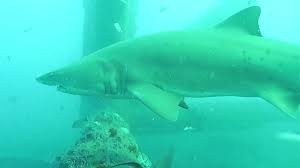

In [ ]:
# 원본 이미지
none_trans[359][0]

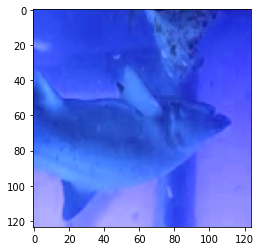

In [ ]:
# augmentation을 적용한 shark 이미지
imshow((trainset[359][0]),resize_train_mean,resize_train_std)

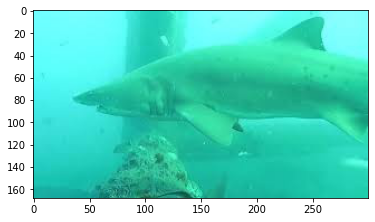

In [ ]:
plt.imshow(none_trans[359][0])

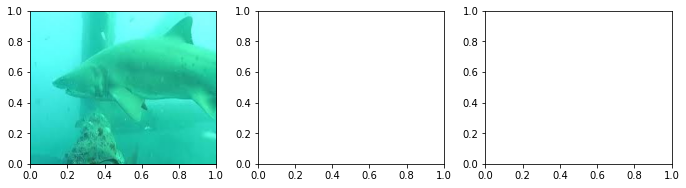

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

fig.add_subplot(1, 3, 1)
plt.imshow(none_trans[359][0], aspect = 'auto')
#plt.xlabel(f'{none_trans.shape}', fontsize = 12)

fig.tight_layout()
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

In [ ]:
fig = plt.figure()
rows = 1
cols = 2

img1 = cv2.imread('IMG01.jpg')
img2 = cv2.imread('IMG03.jpg')
 
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title('Jumok community')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title('Withered trees')
ax2.axis("off")
 
plt.show()


# pytorch 데이터셋 클래스 실습

### 1. 파이토치 데이터 셋 클래스를 직접 만들어보자.

파이토치 데이터 셋 클래스는 init, getitem, len 특수 메소드 3개를 요구한다.   
 항상 같은 포맷을 만드는 습관이 중요하다. 
> 따라서 root_path, mode(train or validation or test), transform(전처리&Augmentation) 3개의 입력을 받아 data와 label을 출력하는 클래스를 만들도록하자.


In [ ]:
from torch.utils.data import Dataset, DataLoader
import cv2
import os 

class Custom_dataset(Dataset):
  def __init__(self, root_path, mode, transforms):
    self.all_data = sorted( glob.glob( os.path.join(root_path, mode, '*', '*') ) ) # 전체 경로
    self.transforms = transforms

  def __getitem__(self, index):
    if torch.is_tensor(index): # 인덱스가 tensor형태일 수 있는 것을 방지
      index = index.tolist()

    data_path = self.all_data[index] # 인덱스가 부여된 데이터 1개
    image = cv2.imread(data_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # cv2 라이브러리의 BGR 형식을 RGB로 permute

    # transfrom 적용
    if self.transforms is not None:
      augmentation = self.transforms(image = image)
      image = augmentation['image']

    # 이미지의 이름을 이용하여, label 부여하기
    if 'dolphin' in data_path:
      label = 0
    elif 'shark' in data_path:
      label = 1
    else:
      label = 2

    return image, label

  def __len__(self):
    length = len(self.all_data)
    return length

### 2. 전처리와 Augmentation을 적용한다.
> Normalize: 픽셀 값에 대해 (X - mean)/std를 진행하며, 이때 통계 값은 ImageNet 데이터 셋의 RGB 통계값을 이용할 것이다.
>   
> 텐서화: 파이토치는 tensor자료 형을 이용하므로 totensor를 해준다.   
>   
> augmentation: trainset에만 적용한다.


In [ ]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2 # albumentations 텐서화 함수

train_transforms = A.Compose([
    A.Resize(224,224),
    A.Transpose(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=20, val_shift_limit=20, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),
    A.ChannelShuffle(),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0), # 이미지넷 데이터셋 통계값으로 Normalize
    A.CoarseDropout(p=0.5),
    ToTensorV2()
])

test_transforms = A.Compose([
    A.Resize(224,224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0), # 텐서타입은 안해줌
    ToTensorV2() # Normalize를 먼저하고 tensor화를 진행해야한다.
])

### Pytorch 데이터 클래스 생성
train_class = Custom_dataset(root_path=root_path, mode='train', transforms=train_transforms)
valid_class = Custom_dataset(root_path=root_path, mode='valid', transforms=test_transforms)
test_class = Custom_dataset(root_path=root_path, mode='test', transforms=test_transforms)

### Pytorch BatchLoader 생성 (학습에 이용할 최종 dataloader)
from torch.utils.data import DataLoader as DataLoader

train_loader = DataLoader(train_class, batch_size=8, shuffle = True, num_workers=0)
valid_loader = DataLoader(valid_class, batch_size=8, shuffle = False, num_workers=0)
test_loader = DataLoader(test_class, batch_size=8, shuffle = False, num_workers=0)

# week4 과제
아래와 같이 원래 0~255 픽셀 값을 가진 귀여운 돌고래 이미지는 Augmentation이 적용되어(train_class[0][0]) 이미지가 변형 되었다.   
**train_class[0][0] 데이터**를 시각화 할 수 있도록 시각화 라이브러리가 요구하는 numpy 타입의 올바른 이미지 데이터로 되돌리는 역함수를 만들어 시각화 해오는 것.   

결과물에 대해서는 week4 pdf의 과제 설명에 있는 이미지를 보시면 이해될 것입니다.

In [ ]:
train_class.all_data[0]

'/content/drive/MyDrive/CV_seminar_project/train/dolphin/dolphin_003.jpg'

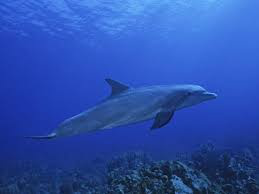

In [ ]:
from PIL import Image as PILImage
PILImage.open(train_class.all_data[0])

In [ ]:
train_class[0][0] # 역함수를 이용해 이것을 시각화 해주세요.

tensor([[[-1.6042, -1.5870, -1.6555,  ..., -0.7993, -0.7822, -0.7822],
         [-1.7754, -1.7412, -1.8097,  ..., -0.7993, -0.7822, -0.7822],
         [-1.8439, -1.8268, -1.8953,  ..., -0.8164, -0.7993, -0.7993],
         ...,
         [-1.7240, -1.7412, -1.7240,  ..., -1.2959, -1.2617, -1.3302],
         [-1.7069, -1.7240, -1.7069,  ..., -1.3473, -1.2959, -1.3473],
         [-1.8268, -1.8268, -1.8268,  ..., -1.3987, -1.3302, -1.3644]],

        [[-1.0903, -1.0903, -1.2304,  ...,  0.2752,  0.2927,  0.2927],
         [-1.3004, -1.3004, -1.4230,  ...,  0.2752,  0.2927,  0.2927],
         [-1.4405, -1.4405, -1.5455,  ...,  0.2927,  0.2927,  0.2927],
         ...,
         [-1.3529, -1.3354, -1.2654,  ..., -0.3725, -0.3550, -0.4076],
         [-1.3179, -1.3004, -1.2479,  ..., -0.4251, -0.3725, -0.4251],
         [-1.4230, -1.4055, -1.3704,  ..., -0.4776, -0.4076, -0.4426]],

        [[-0.2358, -0.2532, -0.4275,  ...,  2.2566,  2.2740,  2.2740],
         [-0.4450, -0.4798, -0.6193,  ...,  2

In [ ]:
def converter(augmentationed_image):


  ### 역함수 로직을 짜주세요. ###


  return converted_image

In [ ]:
get_mean_std(train_class)
get_mean_std(test_class)

-0.9255825 -0.29119268 0.2283739
0.3055502 0.27364329 0.2692045
-1.3390003 -0.105346106 0.8050266
0.39196697 0.27329072 0.28420472


In [ ]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

A_train = A.Compose([
    
    A.Resize(128,128),
    A.OneOf([
        A.HorizontalFlip(p=0.8),
        A.RandomRotate90(p=0.8),
        A.VerticalFlip(p=0.8)
    ], p=1),
    A.OneOf([
        A.MotionBlur(p=0.75),
        A.OpticalDistortion(p=0.75),
        A.GaussNoise(p=0.75)
    ], p=1),
    A.Normalize(mean = (-0.9255825, -0.29119268, 0.2283739), std = (0.3055502, 0.27364329, 0.2692045)),
    A.pytorch.ToTensorV2()

])

A_test = A.Compose([
    
    A.Resize(128,128),
    A.Normalize(mean = (-1.3390003, -0.105346106, 0.8050266), std = (0.39196697, 0.27329072, 0.28420472)),
    A.pytorch.ToTensorV2()

])

train_class = Custom_dataset(root_path=root_path, mode='train', transforms=train_transforms)
test_class = Custom_dataset(root_path=root_path, mode='test', transforms=test_transforms)

train_loader = DataLoader(train_class, batch_size=8, shuffle = True, num_workers=0)
test_loader = DataLoader(test_class, batch_size=8, shuffle = False, num_workers=0)